In [26]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# SVM model for Mobile Price Classification

In [27]:
data = pd.read_csv("./Mobile.csv")
data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Correlation Matrix

Text(0.5, 1.0, 'Correlation ')

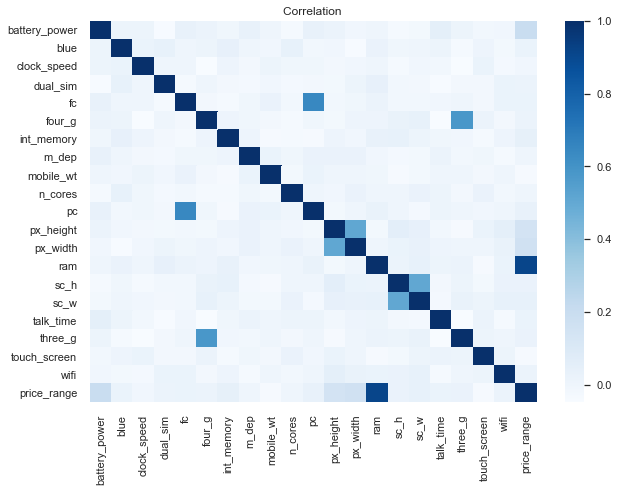

In [29]:
corr=data.corr()
fig = plt.figure(figsize = (10,7))
r = sns.heatmap(corr, cmap = 'Blues')
r.set_title("Correlation ")

    As we can see our target price range has highly positive correlation between ram.
    Also :
     3G and 4G
     pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
     px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
     sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
    features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.
    Now lets see correlation values price range and other features

In [30]:
corr.sort_values(by = ["price_range"],ascending = False).iloc[0].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

    Price range and RAM have about 0.91 correlation. Because of that I compared ram and other features with price range with Altair, Seaborn and Plotly libraries.

### 1- PRICE RANGE AND RAM

    Following histogram shows distribution of ram values according to price range.

    In 0 class(low cost) Ram values are changing between 0- 2000 megabytes
    In 1 class(medium cost) Ram values are changing between 0-3000 megabytes
    In 2 class(high cost) Ram values are changing between 1000-4000 mb
    In 3 class(very high cost) Ram values are changing between 2000 and 4000 mb( mostly 3500-4000 mb)

In [31]:
import altair as alt
chart = alt.Chart(data).mark_bar().encode(
    alt.X('ram', bin = True),
    y ='count(*):Q',
    color ='price_range:N',
).facet(column ='price_range:N')
chart

alt.FacetChart(...)

### 2- BATTERY POWER- RAM AND PRICE RANGE

In [32]:
chart = alt.Chart(data).mark_circle(size = 20).encode(
    x = 'ram',
    y = 'battery_power',
    color = 'price_range:N',
    tooltip = ["price_range", "ram",'battery_power']
).interactive().properties(
    width = 400, height = 300
)
chart

alt.Chart(...)

### 3-  Weight of mobile phone(mobile_wt)- RAM and Price Range

In [33]:
chart = alt.Chart(data).mark_area().encode(
    x = 'ram:Q',
    y = 'mobile_wt:Q',
    color = alt.Color('price_range', scale = alt.Scale(scheme = "magma")),
    row = alt.Row('price_range:N')
).properties(height = 50, width = 400)

chart

alt.Chart(...)

## Training

### Trian and Test Split

In [34]:
#seperating x n y
from sklearn.model_selection import train_test_split
yy = data["price_range"].values
xx_data = data.drop(["price_range"],axis=1)

#Scaling
xx = (xx_data-np.min(xx_data))/(np.max(xx_data)-np.min(xx_data))

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size = 0.2, random_state=0)

In [35]:
xx_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,0.488310,0.0,0.96,1.0,0.052632,1.0,0.354839,0.222222,0.741667,0.571429,0.85,0.184184,0.206275,0.267504,0.785714,0.555556,0.777778,1.0,0.0,0.0
159,0.894456,0.0,0.00,1.0,0.631579,0.0,0.516129,0.666667,0.516667,0.000000,0.80,0.158673,0.697597,0.219669,0.214286,0.000000,0.444444,0.0,0.0,0.0
1827,0.795591,0.0,0.64,0.0,0.210526,1.0,0.000000,0.888889,0.216667,0.000000,0.85,0.968878,0.937250,0.941475,0.285714,0.166667,0.277778,1.0,1.0,1.0
318,0.004676,0.0,0.12,0.0,0.368421,1.0,0.645161,0.222222,0.116667,0.000000,0.40,0.019898,0.038051,0.108765,0.571429,0.666667,0.277778,1.0,0.0,0.0
708,0.317969,1.0,0.92,1.0,0.105263,0.0,0.532258,0.555556,0.708333,0.142857,0.75,0.766327,0.909212,0.924105,1.000000,0.166667,0.444444,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.482966,1.0,0.44,0.0,0.473684,0.0,0.500000,1.000000,0.641667,0.000000,0.90,0.266327,0.042056,0.946018,0.357143,0.277778,0.611111,1.0,1.0,0.0
1216,0.438878,0.0,0.08,1.0,0.052632,1.0,0.435484,0.666667,0.358333,0.142857,1.00,0.158673,0.865154,0.343666,0.857143,0.500000,0.722222,1.0,0.0,1.0
1653,0.460254,0.0,0.60,1.0,0.000000,0.0,0.612903,0.111111,0.108333,0.571429,0.05,0.713776,0.765020,0.896312,0.571429,0.388889,0.388889,0.0,0.0,1.0
559,0.460922,0.0,0.76,1.0,0.105263,0.0,0.177419,0.888889,0.741667,0.000000,0.35,0.091327,0.876502,0.206307,0.642857,0.333333,0.333333,1.0,1.0,1.0


#### Class Balance Visualization

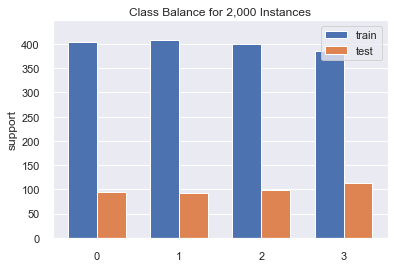

<AxesSubplot:title={'center':'Class Balance for 2,000 Instances'}, ylabel='support'>

In [36]:
#to make sure all number of classes are about the same
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels = [0, 1, 2,3])
visualizer.fit(yy_train, yy_test)
visualizer.poof()

In [37]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(xx_train,yy_train)
print("train accuracy:",svm.score(xx_train,yy_train))
print("test accuracy:",svm.score(xx_test,yy_test))

train accuracy: 0.97125
test accuracy: 0.8525


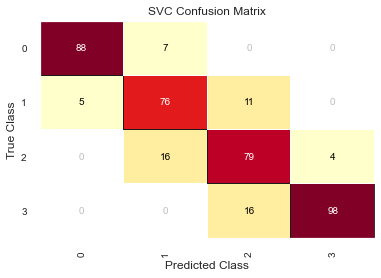

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm, classes=[0,1,2,3])
cm.fit(xx_train, yy_train)
cm.score(xx_test, yy_test)
cm.poof()

    After applying sklearn library,first model has 0.9712 train accuracy and 0.8552 test accuracy. But how can we increase these scores? First let's reduce unnecessary features to improve estimators’ accuracy scores then apply gridsearch method.

### Feature Selection

    I used f_classif method to determine best features

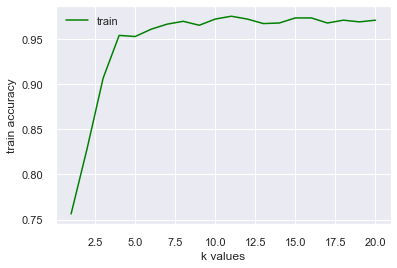

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

accuracy_list_train = []

k = np.arange(1,21,1)

for each in k:
    xx_new = SelectKBest(f_classif, k = each).fit_transform(xx_train, yy_train)
    svm.fit(xx_new,yy_train)
    accuracy_list_train.append(svm.score(xx_new,yy_train))   
    
plt.plot(k, accuracy_list_train, color="green", label = "train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

    In the graph above, we can see arount 10 to 12 features gives higher train accuracies.


In [40]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data = d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.975625
max accuracy id: 10


In [41]:
print(" max accuracy values: \n", df.iloc[10])

 max accuracy values: 
 best features number    11.000000
train_score              0.975625
Name: 10, dtype: float64


    I used 11 features because it will give the highest accuracy.

In [42]:
selector = SelectKBest(f_classif, k = 11)
xx_new = selector.fit_transform(xx_train, yy_train)
xx_new_test = selector.fit_transform(xx_test,yy_test)
names_train = xx_train.columns.values[selector.get_support()]
names_test = xx_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'clock_speed' 'int_memory' 'm_dep' 'n_cores' 'pc'
 'px_height' 'px_width' 'ram' 'three_g' 'wifi']
x test features: ['battery_power' 'clock_speed' 'int_memory' 'm_dep' 'n_cores' 'pc'
 'px_height' 'px_width' 'ram' 'three_g' 'wifi']


    Both train and test data, have the same best feature names that are shown above.


## Hyper Parameter Tuning

In [43]:
#GridSearch
from sklearn.model_selection import GridSearchCV
C = [0.1,0.2,0.5,0.6,0.75,1,1.5,2,2.5,3,3.5,4]
kernel =["linear","rbf"]
gamma = ["auto",0.01,0.001,0.0001,1]
decision_function_shape = ["ovo","ovr"]
cv = 3
svm = SVC(random_state = 1)
grid_svm = GridSearchCV(estimator = SVC(), cv = cv, param_grid = 
                        dict(kernel = kernel, C = C, gamma = gamma, decision_function_shape = decision_function_shape))
grid_svm.fit(xx_new,yy_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.5, 0.6, 0.75, 1, 1.5, 2, 2.5, 3, 3.5,
                               4],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 0.01, 0.001, 0.0001, 1],
                         'kernel': ['linear', 'rbf']})

In [44]:
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9562472331724181
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


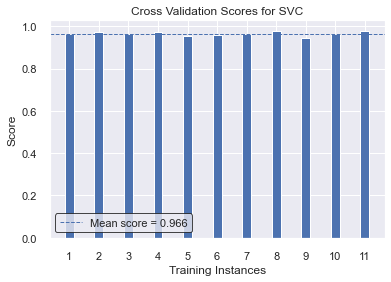

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [45]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(11)

# Create the cv score visualizer
oz = CVScores(
    SVC(C = 4,decision_function_shape = "ovo",gamma = "auto",kernel = "linear",random_state = 1), ax = ax, cv = cv, scoring = 'accuracy')
oz.fit(xx_new, yy_train)
oz.poof()

## Building the Model

In [46]:
svm_model = SVC(C = 4,decision_function_shape = "ovo", gamma = "auto", kernel = "linear", random_state = 1)
svm_model.fit(xx_new,yy_train)
print("train_accuracy:",svm_model.score(xx_new,yy_train))
print("test_accuracy: ", svm_model.score(xx_new_test,yy_test))

train_accuracy: 0.976875
test_accuracy:  0.275


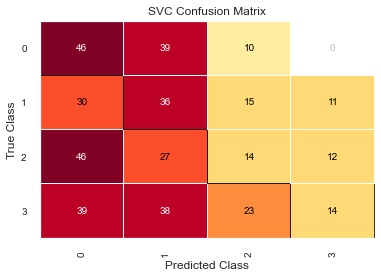

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_model, classes=[0,1,2,3])
cm.fit(xx_new, yy_train)
cm.score(xx_new_test, yy_test)
cm.poof()